# Programming Assignment 1

## Dataload and inspection of the digits dataset

In [90]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

In [91]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [92]:
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [93]:
digits.data.shape

(1797, 64)

Associate the image with its label

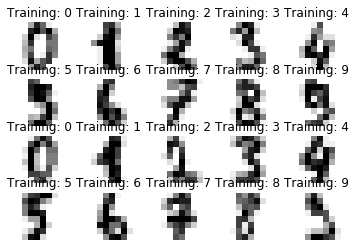

In [94]:
image_with_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_with_labels[:20]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' %label)

## Prepare data for training
Split your data set into 70% training data (features and labels), and 30% test data.

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3, random_state = 20)
X_train.data.shape

(1257, 64)

In [96]:
X_test.data.shape

(540, 64)

## Setup classifier
Set up a sklearn.neighbors.KNeighborsClassifier as it comes in SciKitLearn with n_neighbors = 5, algorithm = 'brute' and otherwise default parameters

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
neighbors_classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')
k_means_classifier = KMeans(n_clusters=10)

Fit a model to the training data

In [98]:
neighbors_classifier.fit(X_train, y_train)
k_means_classifier.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Apply the classifier to the test data

In [99]:
predictions = neighbors_classifier.predict(X_test)
k_means_predictions = k_means_classifier.predict(X_test)

#### KNN Classifier
Get the nearest neighbors (in this case 5) and the corresponding distances in the training set for each test sample
The function returns the indices of k(=5) neighbors from the training dataset for each element of the test set 

In [ ]:
distances, neighbors_ind = neighbors_classifier.kneighbors(X_test)
neighbors = X_train[neighbors_ind]
neighbors.data.shape

Let's plot the image from the test set and its neighbors from the training data

In [ ]:
plt.subplot(1, 6, 1)
plt.imshow(X_test[50].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Test image')
for index, image in enumerate(neighbors[50]):
    plt.subplot(1, 6, index + 2)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Neigh {index+1}')

## Classification Report
Let's see plot some images with their prediction

In [ ]:
images_with_predictions = list(zip(X_test, predictions))
plt.tight_layout()
for index, (image, prediction) in enumerate(images_with_predictions[:10]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %s' %prediction)

Using Sklearn, we can compute the classification report

In [ ]:
from sklearn import metrics

print('Classification report for classifier %s: \n %s\n' %(neighbors_classifier, metrics.classification_report(y_test, predictions)))

disp = metrics.plot_confusion_matrix(neighbors_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")


In [100]:
from sklearn import metrics

print('Classification report for classifier %s: \n %s\n' %(neighbors_classifier, metrics.classification_report(y_test, predictions)))

disp = metrics.plot_confusion_matrix(neighbors_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")


(540, 5, 64)

Let's plot the image from the test set and its neighbors from the training data

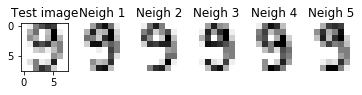

In [101]:
plt.subplot(1, 6, 1)
plt.imshow(X_test[50].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Test image')
for index, image in enumerate(neighbors[50]):
    plt.subplot(1, 6, index + 2)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Neigh {index+1}')

## Classification Report
Let's see plot some images with their prediction


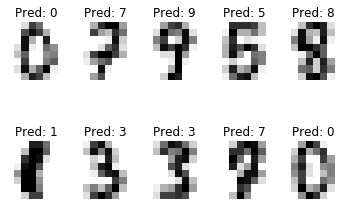

In [102]:
images_with_predictions = list(zip(X_test, predictions))
plt.tight_layout()
for index, (image, prediction) in enumerate(images_with_predictions[:10]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %s' %prediction)

In [103]:
Using Sklearn, we can compute the classification report

SyntaxError: invalid syntax (<ipython-input-103-07b73348b5f3>, line 1)

Classification report for classifier KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        44
           3       0.98      0.97      0.98        63
           4       1.00      1.00      1.00        60
           5       0.96      0.98      0.97        51
           6       1.00      1.00      1.00        59
           7       0.98      0.98      0.98        53
           8       0.98      0.96      0.97        52
           9       0.96      0.94      0.95        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540




Text(0.5, 0.98, 'Confusion Matrix')

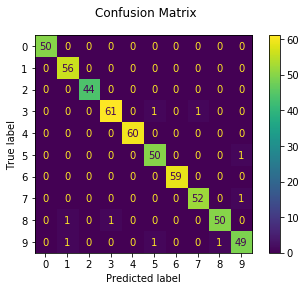

In [88]:
from sklearn import metrics

print('Classification report for classifier %s: \n %s\n' %(neighbors_classifier, metrics.classification_report(y_test, predictions)))

disp = metrics.plot_confusion_matrix(neighbors_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
